In [87]:
from __init__ import *
from raw_quote import utils
% matplotlib inline

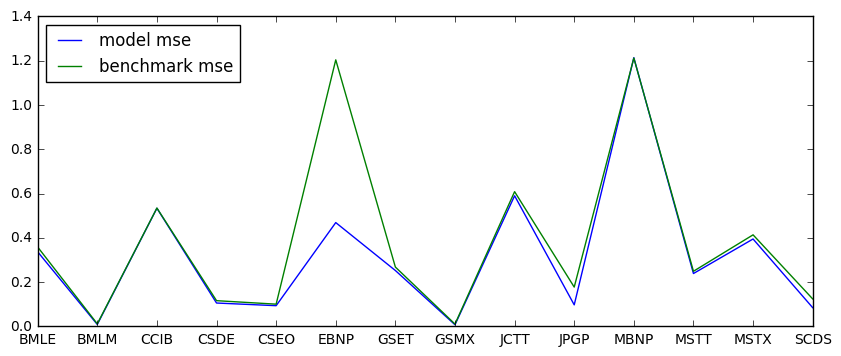

In [88]:
appx =''
batch_size =8
returns = True
mod = 'loss'
be = pd.read_pickle('results/keras_value_importance1benchmark_regr_both' + appx + '.pkl')
res = pd.read_pickle('results/keras_value_importance_regr_ret' + appx + '.pkl')
changes = []
def get_best(df, val):
    df['best_' + mod] = df[val + mod].apply(lambda x: max(x) if (mod == 'acc') else min(x))
    df = df[(df['batch_size'] == batch_size) & (df['returns'] == returns)]
    df = df[df.groupby('data')['best_' + mod].transform(max if (mod == 'acc') else min) == df['best_' + mod]]
    return df.set_index('data', drop=True)
    
res = get_best(res, 'val_main_output_')
res.rename(columns={'best_loss': 'model mse'}, inplace=True)
be = get_best(be, 'val_')
be.rename(columns={'best_loss': 'benchmark mse'}, inplace=True)

both = pd.concat([res['model mse'], be['benchmark mse']], axis=1)
fig, ax = plt.subplots(1, figsize=(10,4))
both.plot(ax=ax)
ax.set_xticks(np.arange(both.shape[0]))
ax.set_xticklabels(both.index)

In [83]:
both['improvement (%)'] = 1 - both['model mse']/ both['benchmark mse']
print(both.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  model mse &  benchmark mse &  improvement (\%) \\
\midrule
BMLE &   0.337039 &       0.358594 &         0.060109 \\
BMLM &   0.008941 &       0.011769 &         0.240278 \\
CCIB &   0.533938 &       0.534718 &         0.001458 \\
CSDE &   0.105786 &       0.116400 &         0.091186 \\
CSEO &   0.093723 &       0.100606 &         0.068416 \\
EBNP &   0.469053 &       1.203992 &         0.610419 \\
GSET &   0.252570 &       0.268212 &         0.058322 \\
GSMX &   0.007669 &       0.010765 &         0.287622 \\
JCTT &   0.590163 &       0.608728 &         0.030497 \\
JPGP &   0.097481 &       0.177789 &         0.451702 \\
MBNP &   1.213756 &       1.212178 &        -0.001302 \\
MSTT &   0.238991 &       0.249157 &         0.040803 \\
MSTX &   0.394941 &       0.413691 &         0.045323 \\
SCDS &   0.084814 &       0.124367 &         0.318033 \\
\bottomrule
\end{tabular}



In [111]:
save_file = 'results/keras_value_importance1benchmark_regr_ret_NeX.pkl' 
df = pd.read_pickle(save_file)
results = [v for k, v in df.T.to_dict().items()]

In [158]:
save_file = 'results/keras_value_importance1benchmark_class_ret.pkl' 
df = pd.read_pickle(save_file)
print('LINEAR CLASSIFIER')
print(df.shape)
[(source, np.max(acc), np.argmax(acc), date, bs) for source, acc, date, bs in zip(df['data'], df['val_acc'], df['datetime'], df['batch_size'])][14:]

LINEAR CLASSIFIER
(67, 14)


[('ABNP', 0.87208850931677018, 29, '2017-01-20T11:57:57.964466', 64),
 ('BMLE', 0.64313271604938271, 50, '2017-01-20T12:00:28.403738', 64),
 ('BMLM', 0.95968364197530864, 33, '2017-01-20T12:02:18.330803', 64),
 ('BXCY', 0.80065993788819878, 35, '2017-01-20T12:09:09.748648', 64),
 ('Barc', 0.87927018429922021, 30, '2017-01-20T12:10:58.401638', 64),
 ('CCGB', 0.59239130434782605, 27, '2017-01-20T12:17:33.338114', 64),
 ('CCGC', 0.96020962732919257, 35, '2017-01-20T12:24:31.392984', 64),
 ('CCIB', 0.82829457244207694, 23, '2017-01-20T12:26:59.392739', 64),
 ('CGCX', 0.57725155279503104, 12, '2017-01-20T12:31:01.695672', 64),
 ('CMAr', 0.72340838509316774, 36, '2017-01-20T12:44:51.763669', 64),
 ('CSDE', 0.85763888888888884, 27, '2017-01-20T12:46:43.528671', 64),
 ('CSEO', 0.86246141975308643, 16, '2017-01-20T12:48:22.889359', 64),
 ('Citi', 0.6655092592592593, 34, '2017-01-20T12:50:39.386128', 64),
 ('Deut', 0.7241512345679012, 43, '2017-01-20T12:52:50.087218', 64),
 ('EBNP', 0.9885481421

In [11]:
print('RNN CLASSIFIER')
save_file = 'results/keras_value_importance_gru_class_ret.pkl'
df = pd.read_pickle(save_file)
[(source, np.max(acc), np.argmax(acc)) for source, acc in zip(df['data'], df['val_acc'])]

RNN CLASSIFIER


[('CSDE', 0.55117186903953552, 42)]

In [132]:
save_file = 'results/keras_value_importance3_class_ret_NeX.pkl' 
df = pd.read_pickle(save_file)
print('NETWORK CLASSIFIER')
print(df.shape)
[(source, np.min(loss), np.argmin(loss), datetime) for source, loss, datetime in zip(df['data'], df['val_main_output_loss'], df['datetime'])]
df['best_acc'] = df['val_main_output_acc'].apply(lambda x: max(x))
df['best_mse'] = df['val_value_output_loss'].apply(lambda x: min(x))
print(df[(df['batch_size'] == 8) & (df['best_mse'] == df.groupby(['data', 'batch_size', 'aux_weight'])['best_mse'].transform(min))][['data', 'best_mse', 'best_acc', 'batch_size', 'datetime', 'act', 'aux_weight']])

NETWORK CLASSIFIER
(32, 29)
    data  best_mse  best_acc  batch_size                    datetime  \
0   CSDE  0.112866  0.944254           8  2017-01-16T22:04:59.790724   
1   BMLE  0.123486  0.659794           8  2017-01-17T00:14:20.030637   
3   CCIB  0.829972  0.930477           8  2017-01-17T04:17:42.403295   
4   CSEO  0.121790  0.940316           8  2017-01-17T05:31:54.586713   
5   EBNP  0.333641  0.994797           8  2017-01-17T06:50:24.052110   
6   GSET  0.073047  0.587891           8  2017-01-17T08:55:36.665059   
7   GSMX  0.009145  0.981839           8  2017-01-17T11:12:05.346888   
8   JCTT  0.230159  0.621110           8  2017-01-17T12:42:24.938625   
9   JPGP  0.055991  0.625430           8  2017-01-17T14:50:54.759650   
10  MBNP  0.261817  0.648721           8  2017-01-17T16:44:11.112762   
11  MSTT  0.116501  0.658147           8  2017-01-17T19:41:12.641164   
13  SCDS  0.075731  0.618962           8  2017-01-18T00:05:19.809547   
28  BMLM  0.007851  0.960171        

In [109]:
save_file = 'results/keras_value_importance_cnn_regr_ret_NeX.pkl' 
df = pd.read_pickle(save_file)
[(source, np.min(loss), np.argmin(loss), datetime) for source, loss, datetime in zip(df['data'], df['val_loss'], df['datetime'])]


[('CSDE', 0.35023967682579416, 126, '2017-01-12T15:16:45.111381'),
 ('BMLE', 0.12731434598013205, 48, '2017-01-12T15:32:45.634352'),
 ('BMLM', 0.010339302620218123, 28, '2017-01-12T15:44:04.091229'),
 ('CCIB', 0.47566981024520344, 191, '2017-01-12T16:14:42.822438'),
 ('CSEO', 0.38032519155078465, 59, '2017-01-12T16:30:49.293082'),
 ('EBNP', 18.766420421393022, 73, '2017-01-12T16:49:47.163330'),
 ('GSET', 0.073731452985494231, 90, '2017-01-12T17:05:15.097028'),
 ('GSMX', 0.043807599567060852, 50, '2017-01-12T17:27:33.759971'),
 ('JCTT', 0.26762878379704041, 71, '2017-01-12T17:46:31.554574'),
 ('JPGP', 0.068207632244369126, 73, '2017-01-12T18:05:36.326587'),
 ('MBNP', 0.29041049896199028, 87, '2017-01-12T18:36:41.033857'),
 ('MSTT', 0.12886219995993156, 109, '2017-01-12T19:24:38.649115'),
 ('MSTX', 0.19316375356765442, 14, '2017-01-12T19:49:31.856884'),
 ('SCDS', 0.073930309740481551, 2, '2017-01-12T20:19:35.113673')]

In [156]:
save_file = 'results/keras_value_importance_regr_ret' 
df = pd.concat([pd.read_pickle(save_file + apx) for apx in ['.pkl','_fs_part2.pkl', '_fs.pkl']])

print('NETWORK REGRESSOR')
[(source, np.min(loss), np.argmin(loss), datetime) for source, loss, datetime in zip(df['data'], df['val_main_output_loss'], 
                                                                                     df['datetime'])]
df['best_loss'] = df['val_main_output_loss'].apply(lambda x: min(x))
print(df[df['best_loss'] == df.groupby('data')['best_loss'].transform(min)][['data', 'best_loss', 'datetime',
                                                                             'batch_size', 'act', 'full_shift', 'architecture']])

NETWORK REGRESSOR
    data  best_loss                    datetime  batch_size  \
16  BMLM   0.008941  2017-01-14T20:57:24.375379           8   
20  GSET   0.252570  2017-01-15T06:07:47.699831           8   
27  SCDS   0.084814  2017-01-15T15:47:24.109696           8   
28  BMLE   0.337039  2017-01-15T17:10:38.395990           8   
31  CCIB   0.533938  2017-01-15T23:30:20.537266           8   
37  JPGP   0.097481  2017-01-16T05:41:37.877706           8   
49  GSMX   0.007669  2017-01-17T03:31:55.008728           8   
53  MSTT   0.238991  2017-01-17T10:42:42.768465           8   
0   ABNP   0.216902  2017-01-18T23:59:29.179817           8   
1   BXCY   0.261310  2017-01-19T21:10:08.390935           8   
2   Barc   0.530061  2017-01-20T02:04:33.233519           8   
3   CCGB   0.693544  2017-01-20T06:17:58.539586           8   
4   CCGC   1.023019  2017-01-20T09:36:17.096340           8   
1   CSDE   0.102873  2017-01-17T01:59:48.045414           8   
4   CSEO   0.092232  2017-01-17T17:39

In [119]:
save_file = 'results/keras_value_importance1benchmark_regr_both.pkl' 
df = pd.read_pickle(save_file)
print(df.shape)
df['benchmark'] = df['val_loss'].apply(lambda x: min(x))
print(df[df['returns']][['data', 'benchmark', 'datetime', 'batch_size']])
# [(source, np.min(loss), np.argmin(loss), datetime) for source, loss, datetime in zip(df['data'], df['val_loss'], df['datetime'])]


(56, 14)
    data  benchmark                    datetime  batch_size
0   BMLE   0.358594  2017-01-13T20:46:51.771236           8
1   BMLE   0.351458  2017-01-13T20:48:07.467788          64
4   CSDE   0.116400  2017-01-13T23:36:44.056594           8
5   CSDE   0.570888  2017-01-13T23:38:22.877763          64
8   BMLM   0.011769  2017-01-14T02:40:11.177735           8
9   BMLM   0.056234  2017-01-14T02:41:15.700667          64
12  CCIB   0.534718  2017-01-14T06:20:35.450049           8
13  CCIB   1.151397  2017-01-14T06:23:10.780971          64
16  CSEO   0.100606  2017-01-14T11:35:41.727912           8
17  CSEO   0.525353  2017-01-14T11:36:55.938484          64
20  EBNP   1.203992  2017-01-14T15:05:07.419738           8
21  EBNP  35.366721  2017-01-14T15:06:49.103772          64
24  GSET   0.268212  2017-01-14T17:44:36.482077           8
25  GSET   0.301501  2017-01-14T17:46:50.687358          64
28  GSMX   0.010765  2017-01-14T20:45:52.736689           8
29  GSMX   0.190486  2017-01-14

In [107]:
save_file = 'results/keras_value_importance1benchmark_regr_ret_NeX.pkl' 
df = pd.read_pickle(save_file)
[(source, np.min(loss), np.argmin(loss), datetime) for source, loss, datetime in zip(df['data'], df['val_loss'], df['datetime'])]


[('CSDE', 0.030777924429671265, 68, '2017-01-06T17:15:03.565895'),
 ('BMLE', 0.037745450956769934, 46, '2017-01-06T17:17:11.135586'),
 ('BMLM', 0.0062779058029668201, 49, '2017-01-06T17:19:21.280107'),
 ('CCIB', 0.026966580644596453, 36, '2017-01-06T17:21:55.712445'),
 ('CSEO', 0.030901570608954369, 46, '2017-01-06T17:24:08.654981'),
 ('CSDE', 0.36728907827241919, 24, '2017-01-06T17:33:01.365242'),
 ('BMLE', 0.13137545137677664, 41, '2017-01-06T17:35:12.857827'),
 ('BMLM', 0.014548168897076889, 52, '2017-01-06T17:37:45.499860'),
 ('CCIB', 0.96856141298316245, 39, '2017-01-06T17:41:11.882999'),
 ('CSEO', 0.38536568335544918, 31, '2017-01-06T17:42:53.487344'),
 ('EBNP', 32.666630516881526, 21, '2017-01-06T17:44:53.547889'),
 ('GSET', 0.10177918353382452, 43, '2017-01-06T17:47:05.162839'),
 ('GSMX', 0.049407188194217508, 35, '2017-01-06T17:48:55.406576'),
 ('JCTT', 0.27291541463798946, 33, '2017-01-06T17:50:43.267432'),
 ('JPGP', 0.07538027362323102, 38, '2017-01-06T17:52:40.250222'),
 ('

In [58]:
print('NETWORK REGRESSOR')
save_file = 'results/keras_value_importance_regr_ret.pkl' 
df = pd.read_pickle(save_file)
[(source, np.min(loss), np.argmin(loss), date) for source, loss, date in zip(df['data'], df['val_main_output_loss'], df['datetime'])]

NETWORK REGRESSOR


[('BMLE', 0.34246862616564944, 2, '2017-01-13T15:59:16.424989'),
 ('BMLE', 0.35259491090080303, 12, '2017-01-13T17:19:14.709687'),
 ('CSDE', 0.10827556718652019, 19, '2017-01-13T18:59:33.165073')]

In [25]:
save_file = 'results/keras_value_importance_cnn_regr.pkl' 
df = pd.read_pickle(save_file)
results = [v for k, v in df.T.to_dict().items()]

In [23]:
save_file = 'results/keras_value_importance_cnn.pkl' 
df = pd.read_pickle(save_file)
results = [v for k, v in df.T.to_dict().items()]

In [9]:
df['best_acc'] = [max(acc) for acc in df['val_acc']]
df['best_epoch'] = [np.argmax(acc) for acc in df['val_acc']]
df['train_acc_at_best'] = [acc[best] for acc, best in zip(df['acc'], df['best_epoch'])]

In [14]:
df[['data', 'best_acc', 'best_epoch', 'train_acc_at_best', 'dropout', 'filters', 'kernelsize', 'norm']].loc[2:]

,data,best_acc,best_epoch,train_acc_at_best,dropout,filters,kernelsize,norm
2,CSDE,0.566551,66,0.588518,"(0.5, 0.5)",32,3,1
3,CSDE,0.585841,120,0.594132,"(0, 0)",32,3,1
4,CSDE,0.555363,118,0.504253,"(0.5, 0)",32,3,1
5,CSDE,0.575810,126,0.610426,"(0.5, 0.5)",128,3,1
6,CSDE,0.580440,62,0.654100,"(0, 0)",128,3,1
7,CSDE,0.580826,217,0.601634,"(0.5, 0)",128,3,1
8,CSDE,0.592400,86,0.590740,"(0.5, 0.5)",32,5,1
9,CSDE,0.573881,192,0.599197,"(0, 0)",32,5,1
10,CSDE,0.587963,181,0.578794,"(0.5, 0)",32,5,1


In [12]:
df.columns

Index(['acc', 'act', 'data', 'date', 'datetime', 'dropout', 'dt', 'filters',
       'kernelsize', 'length', 'loss', 'model_params', 'norm', 'patience',
       'training_time', 'val_acc', 'val_loss', 'verbose', 'best_acc',
       'best_epoch', 'train_acc_at_best'],
      dtype='object')

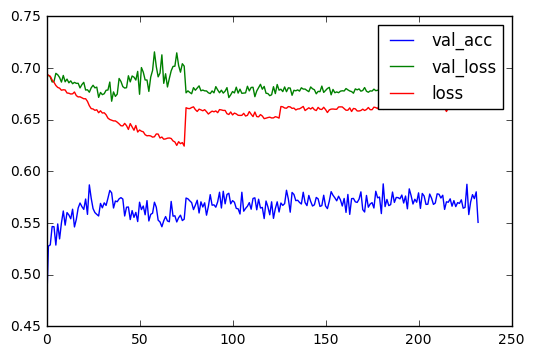

In [22]:
% matplotlib inline
fig, ax = plt.subplots(1)
for col in ['val_acc', 'val_loss', 'loss']:
    ax.plot(df.loc[10, col], label=col)
ax.legend()


In [10]:
df['best_loss'] = [np.min(l) for l in df['val_main_output_loss']]

In [16]:
df[df.groupby(['data', 'layers_no'])['best_loss'].transform(min) == df['best_loss']][['data', 'best_loss', 'layers_no', 'layer_size', 'aux_weight']]

,data,best_loss,layers_no,layer_size,aux_weight
2,CSDE,0.175691,7,8,0.50
6,BMLE,0.021870,7,8,0.50
12,BMLM,0.046584,7,8,0.05
14,CCIB,0.281430,7,8,0.50
19,CSEO,0.212884,7,32,0.50
42,CSDE,0.182106,6,8,0.10
45,CSDE,0.172939,10,32,0.10
51,BMLE,0.020674,10,8,0.80
56,BMLE,0.021080,6,32,0.10
62,BMLM,0.047062,6,8,0.80
